In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a symmetric positive-definite matrix
A = np.array([[2.0, 1.5],
              [1.5, 2.0]])

A_inv = np.linalg.inv(A)
print("A =\n", A)
print("\nA⁻¹ =\n", A_inv)

A =
 [[2.  1.5]
 [1.5 2. ]]

A⁻¹ =
 [[ 1.14285714 -0.85714286]
 [-0.85714286  1.14285714]]


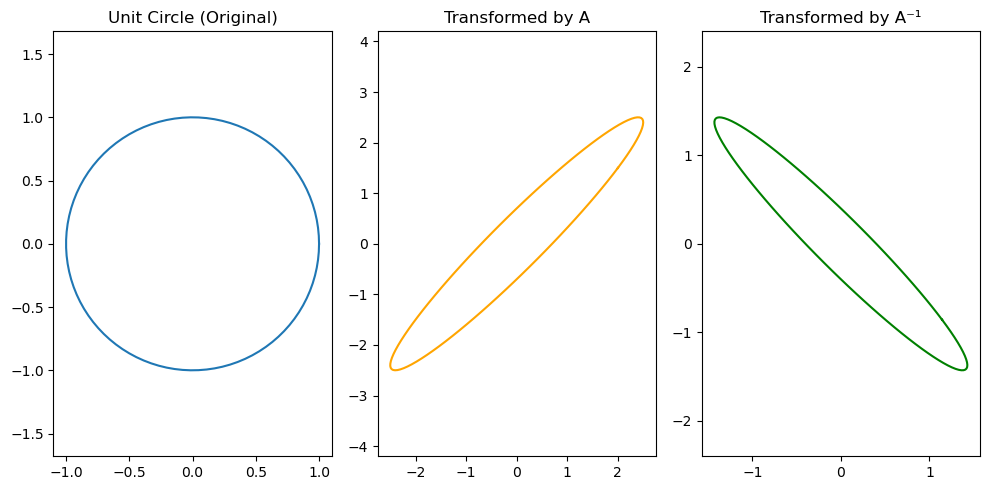

In [2]:
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.stack([np.cos(theta), np.sin(theta)])  # shape: (2, 100)

transformed = A @ circle
inverse_transformed = A_inv @ circle

plt.figure(figsize=(10, 5))

# Original
plt.subplot(1, 3, 1)
plt.plot(circle[0], circle[1])
plt.title("Unit Circle (Original)")
plt.axis("equal")

# Transformed by A
plt.subplot(1, 3, 2)
plt.plot(transformed[0], transformed[1], color='orange')
plt.title("Transformed by A")
plt.axis("equal")

# Transformed by A⁻¹
plt.subplot(1, 3, 3)
plt.plot(inverse_transformed[0], inverse_transformed[1], color='green')
plt.title("Transformed by A⁻¹")
plt.axis("equal")

plt.tight_layout()
plt.show()

/var/folders/h3/qqtnz2p16_gdpmpsczh0d3zh0000gn/T/ipykernel_73456/3861813029.py:67: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()


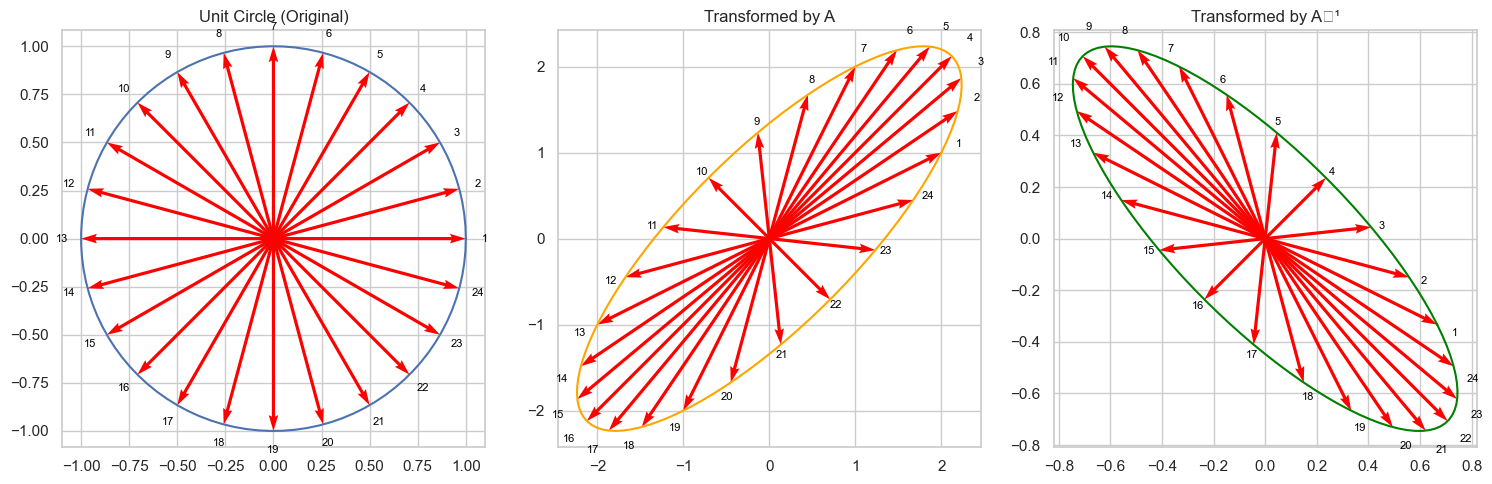

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Define theta for the unit circle
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.stack([np.cos(theta), np.sin(theta)])  # shape: (2, 100)

# Define 24 sample points for vectors
num_points = 24
sample_theta = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
sample_points = np.stack([np.cos(sample_theta), np.sin(sample_theta)])  # shape: (2, 24)

# Define a sample transformation matrix A and its inverse
A = np.array([[2, 1], [1, 2]])  # Replace with your matrix A
A_inv = np.linalg.inv(A)

# Apply transformations to the circle and sample points
transformed = A @ circle
inverse_transformed = A_inv @ circle
sample_transformed = A @ sample_points
sample_inverse_transformed = A_inv @ sample_points

# Plotting
plt.figure(figsize=(15, 5))

# Original Unit Circle
plt.subplot(1, 3, 1)
plt.plot(circle[0], circle[1], label='Unit Circle')
# Plot vectors for sample points
plt.quiver(np.zeros(num_points), np.zeros(num_points), 
           sample_points[0], sample_points[1], 
           color='red', angles='xy', scale_units='xy', scale=1)
# Label vectors
for i in range(num_points):
    plt.text(sample_points[0, i]*1.1, sample_points[1, i]*1.1, str(i+1), 
             color='black', fontsize=8, ha='center', va='center')
plt.title("Unit Circle (Original)")
plt.axis("equal")
plt.grid(True)

# Transformed by A
plt.subplot(1, 3, 2)
plt.plot(transformed[0], transformed[1], color='orange', label='Transformed')
plt.quiver(np.zeros(num_points), np.zeros(num_points), 
           sample_transformed[0], sample_transformed[1], 
           color='red', angles='xy', scale_units='xy', scale=1)
for i in range(num_points):
    plt.text(sample_transformed[0, i]*1.1, sample_transformed[1, i]*1.1, str(i+1), 
             color='black', fontsize=8, ha='center', va='center')
plt.title("Transformed by A")
plt.axis("equal")
plt.grid(True)

# Transformed by A⁻¹
plt.subplot(1, 3, 3)
plt.plot(inverse_transformed[0], inverse_transformed[1], color='green', label='Transformed')
plt.quiver(np.zeros(num_points), np.zeros(num_points), 
           sample_inverse_transformed[0], sample_inverse_transformed[1], 
           color='red', angles='xy', scale_units='xy', scale=1)
for i in range(num_points):
    plt.text(sample_inverse_transformed[0, i]*1.1, sample_inverse_transformed[1, i]*1.1, str(i+1), 
             color='black', fontsize=8, ha='center', va='center')
plt.title("Transformed by A⁻¹")
plt.axis("equal")
plt.grid(True)

plt.tight_layout()
plt.show()

Eigenvalues: [0.5 3.5]
Eigenvectors:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


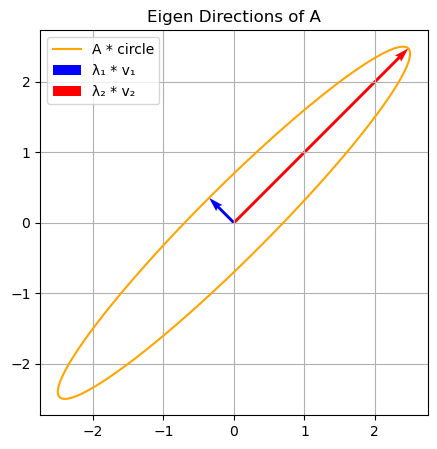

In [3]:
eigvals, eigvecs = np.linalg.eigh(A)  # symmetric matrix, use eigh
print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)

# Plot eigenvectors
plt.figure(figsize=(5, 5))
plt.plot(transformed[0], transformed[1], label='A * circle', color='orange')
plt.quiver(0, 0, *(eigvals[0] * eigvecs[:, 0]), angles='xy', scale_units='xy', scale=1, color='blue', label='λ₁ * v₁')
plt.quiver(0, 0, *(eigvals[1] * eigvecs[:, 1]), angles='xy', scale_units='xy', scale=1, color='red', label='λ₂ * v₂')
plt.title("Eigen Directions of A")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()

In [69]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# 1. Identity Matrix
I = np.eye(10)
I_inv = np.linalg.inv(I)  # Should be I itself
eigvals_I, eigvecs_I = np.linalg.eigh(I)

# 2. Diagonal Matrix
D = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
D_inv = np.linalg.inv(D)  # Diagonal with reciprocals
eigvals_D, eigvecs_D = np.linalg.eigh(D)

# 3. Positive Correlation Matrix
C_pos = 0.5 * np.ones((10, 10)) + 0.5 * np.eye(10)  # 1 on diagonal, 0.5 off-diagonal
C_pos_inv = np.linalg.inv(C_pos)
eigvals_C_pos, eigvecs_C_pos = np.linalg.eigh(C_pos)

# 4. Negative Correlation Matrix
C_neg = -0.1 * np.ones((10, 10)) + 1.1 * np.eye(10)  # 1 on diagonal, -0.1 off-diagonal
C_neg_inv = np.linalg.inv(C_neg)
eigvals_C_neg, eigvecs_C_neg = np.linalg.eigh(C_neg)

# 5. Mixed Correlation Matrix
C_mix = np.eye(10)
for i in range(5):
    for j in range(5):
        if i != j:
            C_mix[i, j] = 0.4  # Positive correlations for first 5
for i in range(5, 10):
    for j in range(5, 10):
        if i != j:
            C_mix[i, j] = -0.2  # Negative correlations for last 5
for i in range(5):
    for j in range(5, 10):
        C_mix[i, j] = C_mix[j, i] = 0.1  # Mixed cross-correlations
C_mix_inv = np.linalg.inv(C_mix)
eigvals_C_mix, eigvecs_C_mix = np.linalg.eigh(C_mix)

# Print results
matrices = {
    "Identity": (I, I_inv, eigvals_I, eigvecs_I),
    "Diagonal": (D, D_inv, eigvals_D, eigvecs_D),
    "Positive Correlation": (C_pos, C_pos_inv, eigvals_C_pos, eigvecs_C_pos),
    "Negative Correlation": (C_neg, C_neg_inv, eigvals_C_neg, eigvecs_C_neg),
    "Mixed Correlation": (C_mix, C_mix_inv, eigvals_C_mix, eigvecs_C_mix)
}

for name, (A, A_inv, eigvals, eigvecs) in matrices.items():
    print(f"\n{name} Matrix:")
    print("Eigenvalues:", np.round(eigvals, 4))
    print("Inverse (first 2x2 block for brevity):")
    print(np.round(A_inv[:2, :2], 4))
    print("Eigenvectors (first two for brevity):")
    print(np.round(eigvecs[:, :2], 4))


Identity Matrix:
Eigenvalues: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Inverse (first 2x2 block for brevity):
[[1. 0.]
 [0. 1.]]
Eigenvectors (first two for brevity):
[[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

Diagonal Matrix:
Eigenvalues: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Inverse (first 2x2 block for brevity):
[[1.  0. ]
 [0.  0.5]]
Eigenvectors (first two for brevity):
[[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

Positive Correlation Matrix:
Eigenvalues: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 5.5]
Inverse (first 2x2 block for brevity):
[[ 1.8182 -0.1818]
 [-0.1818  1.8182]]
Eigenvectors (first two for brevity):
[[-0.      0.    ]
 [ 0.     -0.    ]
 [ 0.      0.    ]
 [-0.1593  0.    ]
 [ 0.0329  0.5258]
 [-0.6102  0.1558]
 [-0.1571  0.1779]
 [-0.1571 -0.8165]
 [ 0.5253 -0.0215]
 [ 0.5253 -0.0215]]

Negative Correlation Matrix:
Eigenvalues: [0.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1]
Inverse (

In [17]:
!pip install seaborn --upgrade
!pip install matplotlib --upgrade

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c2/86/e1c86690610661cd716eda5f9d0b35eaf606ae6c9b6736687cfc8f2d0cd8/matplotlib-3.10.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Define theta for 24 points on the unit circle
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)
circle = np.stack([np.cos(theta), np.sin(theta)])  # shape: (2, 24)

# Define matrices and their inverses
I = np.array([[1, 0], [0, 1]])
I_inv = np.linalg.inv(I)

A = np.array([[2, 1], [1, 2]])
A_inv = np.linalg.inv(A)

S = np.array([[2, 0], [0, 1]])
S_inv = np.linalg.inv(S)

R = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]])
R_inv = R.T  # Rotation matrix inverse is its transpose

H = np.array([[1, 1], [0, 1]])
H_inv = np.linalg.inv(H)

# Function to plot transformations
def plot_transformation(matrix, matrix_inv, title_base, matrix_name, filename):
    transformed = matrix @ circle
    inverse_transformed = matrix_inv @ circle
    
    plt.figure(figsize=(15, 5))
    
    # Original Unit Circle
    plt.subplot(1, 3, 1)
    plt.quiver(np.zeros(24), np.zeros(24), circle[0], circle[1], color='red', angles='xy', scale_units='xy', scale=1)
    for i in range(24):
        plt.text(circle[0, i]*1.1, circle[1, i]*1.1, str(i+1), color='black', fontsize=8, ha='center', va='center')
    plt.plot(circle[0], circle[1], 'b--')
    plt.title(f"{title_base} (Original)")
    plt.axis('equal')
    plt.xlim(-2.3, 2.3)
    plt.ylim((-2.3, 2.3))
    plt.grid(True)
    
    # Transformed by Matrix
    plt.subplot(1, 3, 2)
    plt.quiver(np.zeros(24), np.zeros(24), transformed[0], transformed[1], color='red', angles='xy', scale_units='xy', scale=1)
    for i in range(24):
        plt.text(transformed[0, i]*1.1, transformed[1, i]*1.1, str(i+1), color='black', fontsize=8, ha='center', va='center')
    plt.plot(transformed[0], transformed[1], 'orange')
    plt.title(f"{title_base} Transformed by {matrix_name}")
    plt.axis('equal')
    plt.xlim(-2.3, 2.3)
    plt.ylim((-2.3, 2.3))
    plt.grid(True)
    
    # Transformed by Inverse
    ax = plt.subplot(1, 3, 3)
    plt.quiver(np.zeros(24), np.zeros(24), inverse_transformed[0], inverse_transformed[1], color='red', angles='xy', scale_units='xy', scale=1)
    for i in range(24):
        plt.text(inverse_transformed[0, i]*1.1, inverse_transformed[1, i]*1.1, str(i+1), color='black', fontsize=8, ha='center', va='center')
    plt.plot(inverse_transformed[0], inverse_transformed[1], 'green')
    plt.title(f"{title_base} Transformed by {matrix_name}^{-1}")
    plt.axis('equal')
    ax.set_aspect('auto')
    plt.xlim((-2.3, 2.3))
    plt.ylim((-2.3, 2.3))
    plt.grid(True)
    
    # plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Generate graphs
plot_transformation(I, I_inv, "Unit Circle", "I(identity matrix)", "unit_circle_I.png")
plot_transformation(A, A_inv, "Unit Circle", "A(master matrix)", "unit_circle_A.png")
plot_transformation(S, S_inv, "Unit Circle", "S(stretch matrix)", "unit_circle_S.png")
plot_transformation(R, R_inv, "Unit Circle", "R(rotation matrix)", "unit_circle_R.png")
plot_transformation(H, H_inv, "Unit Circle", "H(Shear matrix)", "unit_circle_H.png")

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load Iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Standardize (zero mean, unit variance)
X_std = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_std, columns=feature_names)
df.head()

Matplotlib is building the font cache; this may take a moment.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [2]:
# Covariance matrix
cov_matrix = np.cov(X_std.T)

# Inverse = precision matrix
precision_matrix = np.linalg.inv(cov_matrix)

# Convert to DataFrames for labeling
cov_df = pd.DataFrame(cov_matrix, index=feature_names, columns=feature_names)
prec_df = pd.DataFrame(precision_matrix, index=feature_names, columns=feature_names)

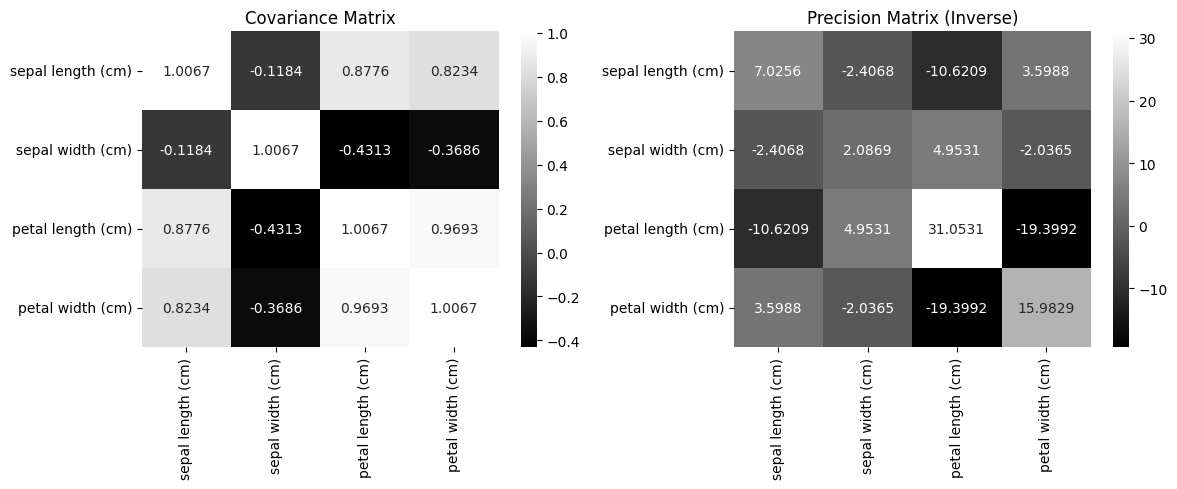

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cov_df, annot=True, cmap="grey", fmt=".4f")
plt.title("Covariance Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(prec_df, annot=True, cmap="grey", fmt=".4f")
plt.title("Precision Matrix (Inverse)")

plt.tight_layout()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load and standardize Iris data
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
X_std = StandardScaler().fit_transform(X)

# Covariance and Precision matrices
cov_matrix = np.cov(X_std.T)
precision_matrix = np.linalg.inv(cov_matrix)

# Convert to labeled DataFrames
cov_df = pd.DataFrame(cov_matrix, index=feature_names, columns=feature_names)
prec_df = pd.DataFrame(precision_matrix, index=feature_names, columns=feature_names)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 7))  # Wider figure

sns.heatmap(cov_df, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            ax=axs[0], 
            square=True, 
            annot_kws={"size": 10},
            cbar_kws={'label': 'Covariance'})

axs[0].set_title("Covariance Matrix", fontsize=14)

sns.heatmap(prec_df, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            ax=axs[1], 
            square=True, 
            annot_kws={"size": 10},
            cbar_kws={'label': 'Precision (Inverse)'})

axs[1].set_title("Precision Matrix (Cov⁻¹)", fontsize=14)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

title: 1. Identity Matrix (Uncorrelated), matrix: [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]], inverse_matrix: [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


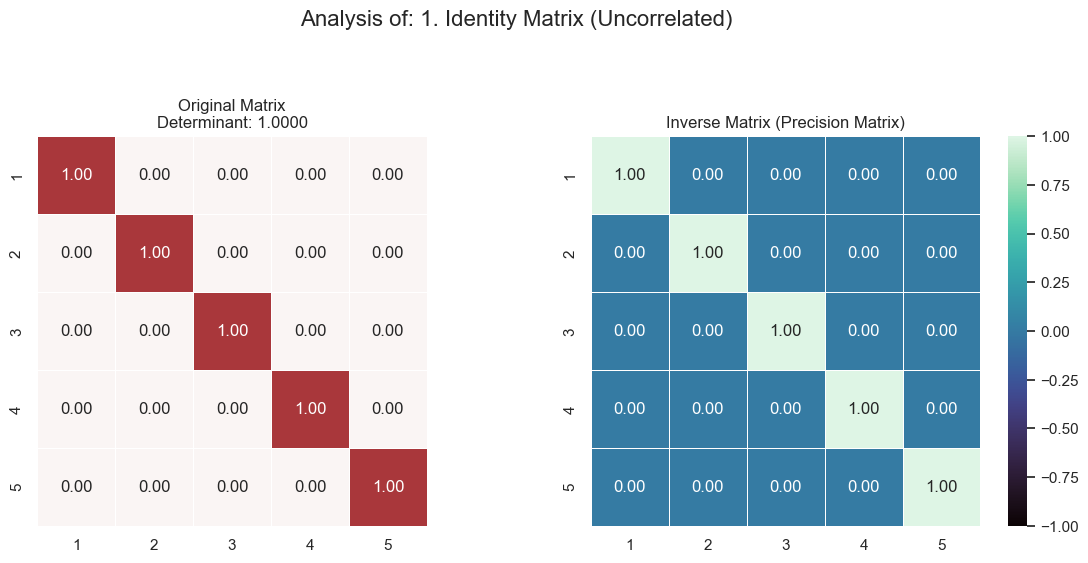

title: 2. Highly Positively Correlated, matrix: [[1.  0.9 0.9 0.9 0.9]
 [0.9 1.  0.9 0.9 0.9]
 [0.9 0.9 1.  0.9 0.9]
 [0.9 0.9 0.9 1.  0.9]
 [0.9 0.9 0.9 0.9 1. ]], inverse_matrix: [[ 8.04347826 -1.95652174 -1.95652174 -1.95652174 -1.95652174]
 [-1.95652174  8.04347826 -1.95652174 -1.95652174 -1.95652174]
 [-1.95652174 -1.95652174  8.04347826 -1.95652174 -1.95652174]
 [-1.95652174 -1.95652174 -1.95652174  8.04347826 -1.95652174]
 [-1.95652174 -1.95652174 -1.95652174 -1.95652174  8.04347826]]


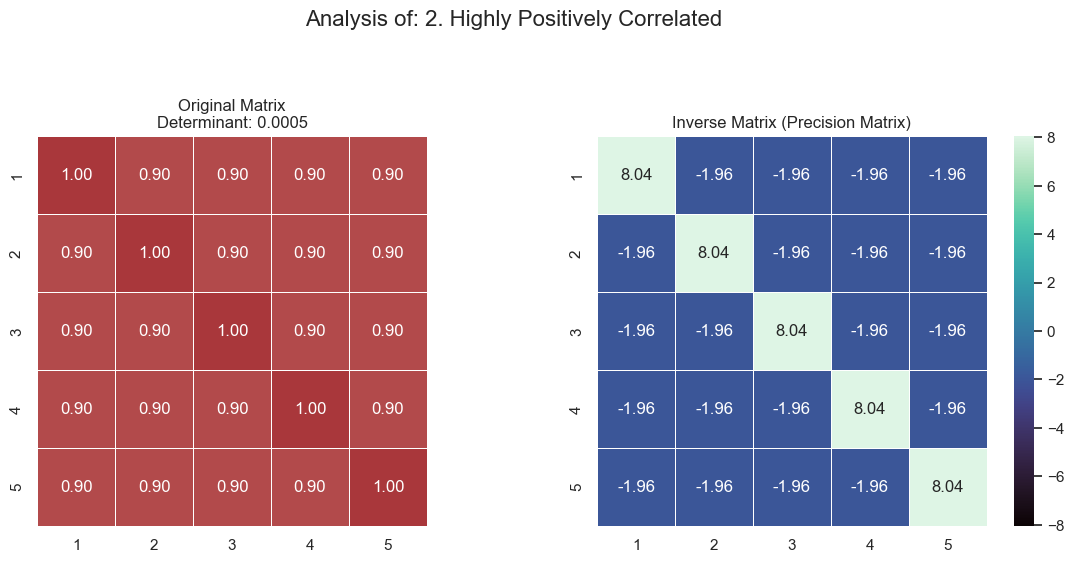

title: 3. Highly Negatively Correlated Blocks, matrix: [[ 1.   -0.8  -0.7  -0.6  -0.75]
 [-0.8   1.   -0.65 -0.55 -0.7 ]
 [-0.7  -0.65  1.   -0.9  -0.85]
 [-0.6  -0.55 -0.9   1.   -0.95]
 [-0.75 -0.7  -0.85 -0.95  1.  ]], inverse_matrix: [[ 0.40404854 -0.13146576 -0.231782   -0.25830721 -0.23139617]
 [-0.13146576  0.44397244 -0.22959752 -0.25805186 -0.22812577]
 [-0.231782   -0.22959752  0.33109475 -0.18287781 -0.22685816]
 [-0.25830721 -0.25805186 -0.18287781  0.3607683  -0.18708297]
 [-0.23139617 -0.22812577 -0.22685816 -0.18708297  0.29620658]]


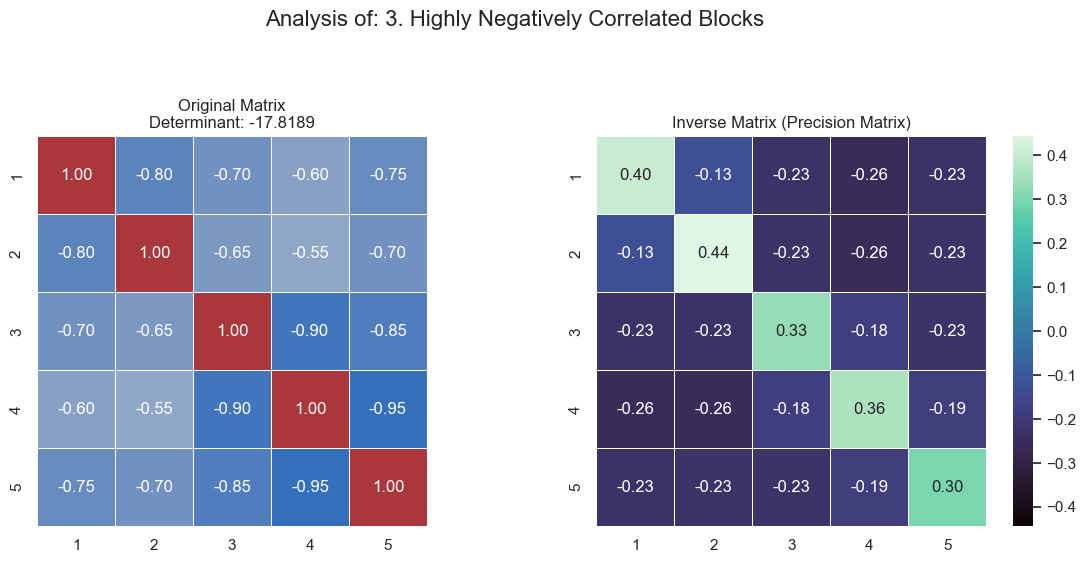

title: 4. Mixed Correlations, matrix: [[ 1.    0.8  -0.2   0.05 -0.5 ]
 [ 0.8   1.    0.3   0.1  -0.1 ]
 [-0.2   0.3   1.   -0.9   0.4 ]
 [ 0.05  0.1  -0.9   1.   -0.3 ]
 [-0.5  -0.1   0.4  -0.3   1.  ]], inverse_matrix: [[-0.05817759  1.08646644 -2.56417715 -2.28783361  0.41887863]
 [ 1.08646644 -0.78976074  2.38600829  2.22529271  0.17744164]
 [-2.56417715  2.38600829 -1.01610792 -1.33626645 -1.03792451]
 [-2.28783361  2.22529271 -1.33626645 -0.4690568  -0.52759799]
 [ 0.41887863  0.17744164 -1.03792451 -0.52759799  1.48407389]]


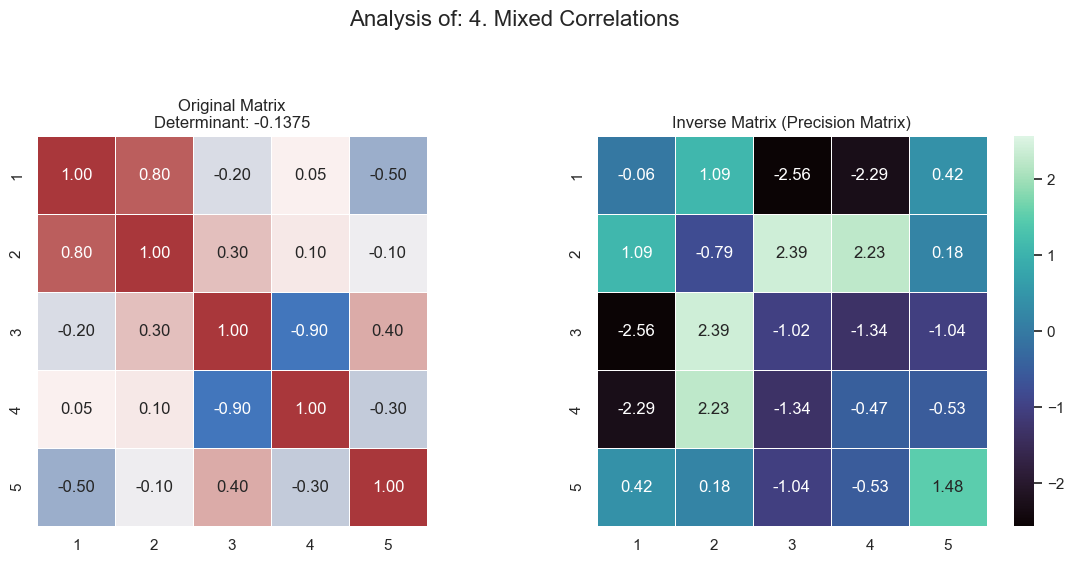

(-0.13751,
 array([[-0.05817759,  1.08646644, -2.56417715, -2.28783361,  0.41887863],
        [ 1.08646644, -0.78976074,  2.38600829,  2.22529271,  0.17744164],
        [-2.56417715,  2.38600829, -1.01610792, -1.33626645, -1.03792451],
        [-2.28783361,  2.22529271, -1.33626645, -0.4690568 , -0.52759799],
        [ 0.41887863,  0.17744164, -1.03792451, -0.52759799,  1.48407389]]))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set a consistent style for the plots
sns.set_theme(style="white")

def analyze_and_plot_matrix(matrix, title):
    """
    Calculates determinant and inverse, then plots the original matrix
    and its inverse using heatmaps.
    """
    # --- Ensure the matrix is valid ---
    # A covariance matrix must be symmetric and positive semi-definite.
    # We check for positive semi-definiteness by ensuring all eigenvalues are non-negative.
    eigenvalues = np.linalg.eigvals(matrix)
    if not np.all(eigenvalues >= -1e-10): # Using a small tolerance for floating point errors
        print(f"Warning: The matrix for '{title}' is not positive semi-definite!")
        # return None, None, None # Or handle as an error

    # --- Calculations ---
    determinant = np.linalg.det(matrix)

    # Calculate inverse, with error handling for singular matrices
    try:
        inverse_matrix = np.linalg.inv(matrix)
        print(f"title: {title}, matrix: {matrix}, inverse_matrix: {inverse_matrix}")
    except np.linalg.LinAlgError:
        print(f"Matrix for '{title}' is singular and cannot be inverted.")
        inverse_matrix = np.full_like(matrix, np.nan) # Fill with NaNs if not invertible

    # --- Plotting ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5.5))
    fig.suptitle(f'Analysis of: {title}', fontsize=16, y=1.02)

    # Plot Original Covariance Matrix
    sns.heatmap(matrix, ax=axes[0], annot=True, fmt=".2f", cmap="vlag", vmin=-1, vmax=1,
                linewidths=.5, cbar=False, square=True)
    axes[0].set_title(f'Original Matrix\nDeterminant: {determinant:.4f}')
    axes[0].set_xticklabels(range(1, 6))
    axes[0].set_yticklabels(range(1, 6))


    # Plot Inverse Covariance Matrix (Precision Matrix)
    # Use a different color scale for the inverse as values can be large
    if not np.isnan(inverse_matrix).all():
        vmax_inv = np.max(np.abs(inverse_matrix)) # Symmetric color scale
        sns.heatmap(inverse_matrix, ax=axes[1], annot=True, fmt=".2f", cmap="mako",
                    linewidths=.5, cbar=True, square=True,
                    vmin=-vmax_inv, vmax=vmax_inv)
    axes[1].set_title('Inverse Matrix (Precision Matrix)')
    axes[1].set_xticklabels(range(1, 6))
    axes[1].set_yticklabels(range(1, 6))


    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return determinant, inverse_matrix

# --- 1. Identity Matrix (No Correlation) ---
identity_matrix = np.identity(5)
analyze_and_plot_matrix(identity_matrix, "1. Identity Matrix (Uncorrelated)")


# --- 2. Highly Positively Correlated Matrix ---
# All variables are strongly positively correlated with each other.
pos_corr_matrix = np.full((5, 5), 0.9)
np.fill_diagonal(pos_corr_matrix, 1)
analyze_and_plot_matrix(pos_corr_matrix, "2. Highly Positively Correlated")


# --- 3. Highly Negatively Correlated Matrix ---
# Here, we create two blocks of positively correlated variables,
# and these two blocks are negatively correlated with each other.
# This structure ensures the matrix is positive semi-definite.
neg_corr_matrix = np.array([
    [1.0, -0.8, -0.7, -0.6, -0.75],
    [-0.8, 1.0, -0.65, -0.55, -0.7],
    [-0.7, -0.65, 1.0, -0.9, -0.85],
    [-0.6, -0.55, -0.9, 1.0, -0.95],
    [-0.75, -0.7, -0.85, -0.95, 1.0]
])
analyze_and_plot_matrix(neg_corr_matrix, "3. Highly Negatively Correlated Blocks")


# --- 4. Mixed Correlation Matrix ---
# A more realistic mix of positive, negative, and weak correlations.
# Var 3 and 4 are strongly negatively correlated. Var 1 and 2 are strongly positive.
# Var 5 has mixed relationships.
mixed_corr_matrix = np.array([
    [1.0, 0.8, -0.2, 0.05, -0.5],
    [0.8, 1.0, 0.3, 0.1, -0.1],
    [-0.2, 0.3, 1.0, -0.9, 0.4],
    [0.05, 0.1, -0.9, 1.0, -0.3],
    [-0.5, -0.1, 0.4, -0.3, 1.0]
])
analyze_and_plot_matrix(mixed_corr_matrix, "4. Mixed Correlations")



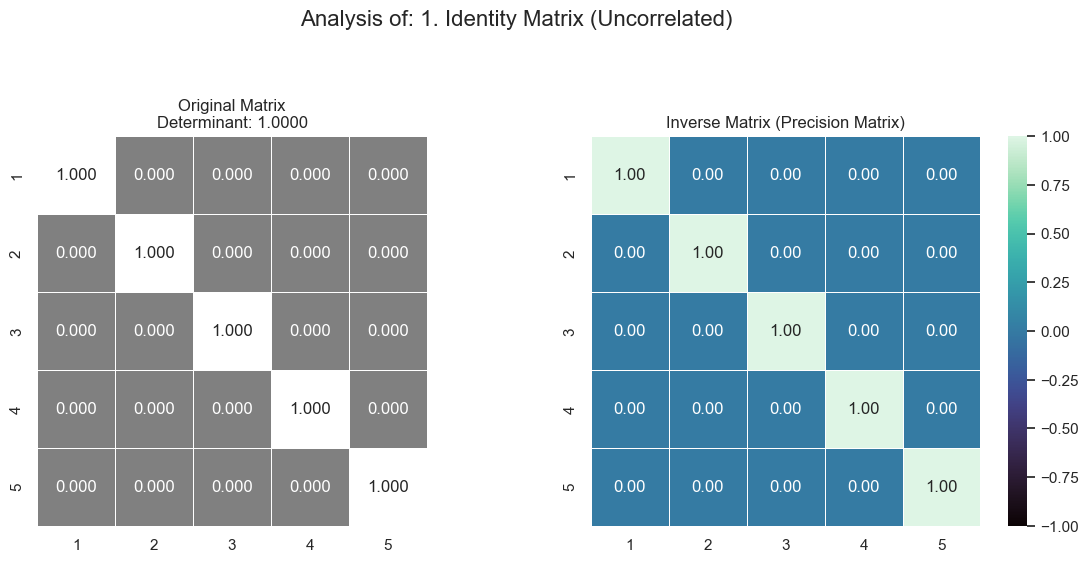

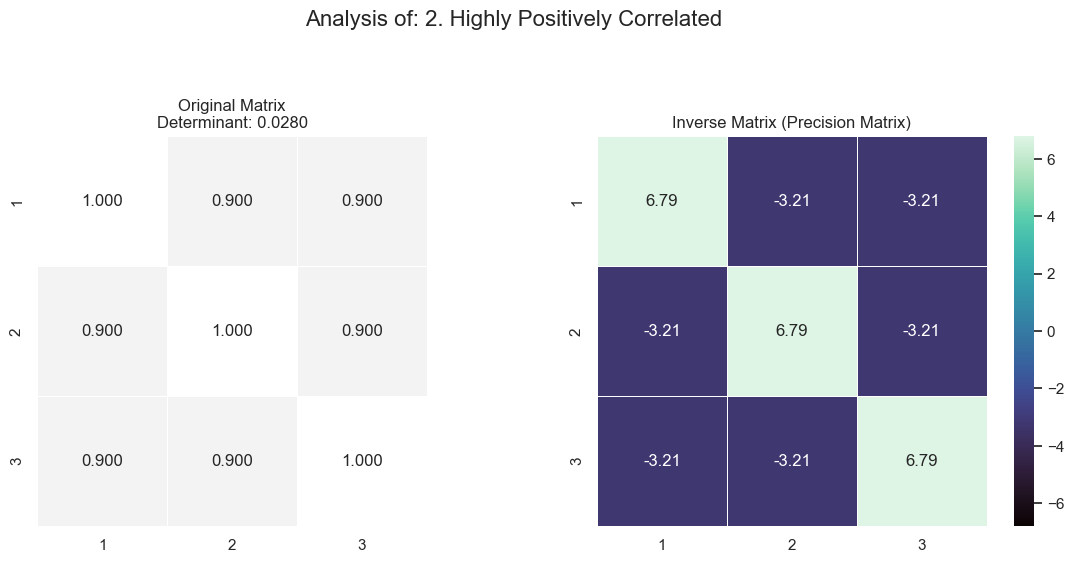

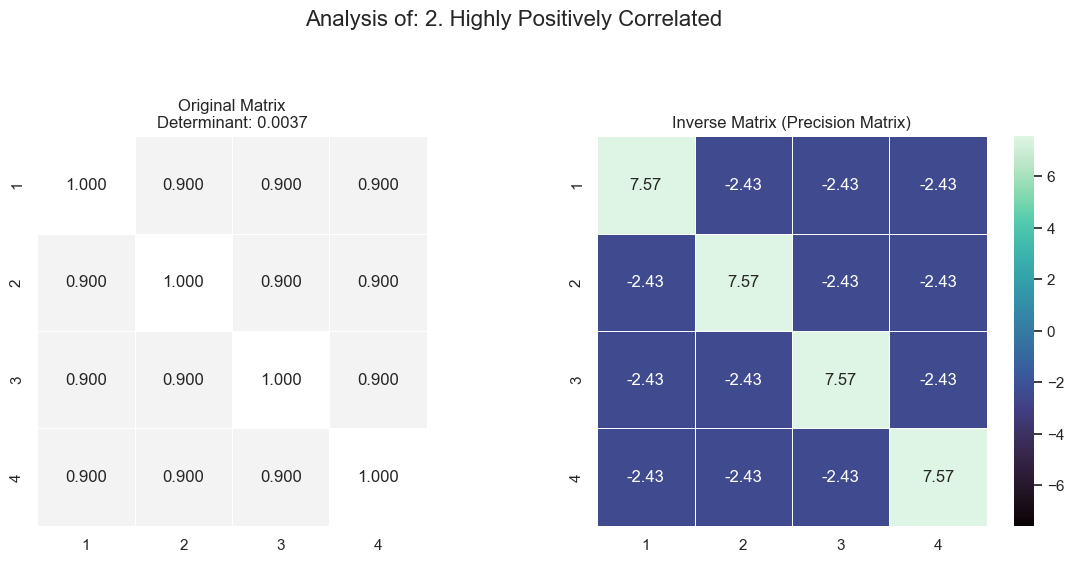

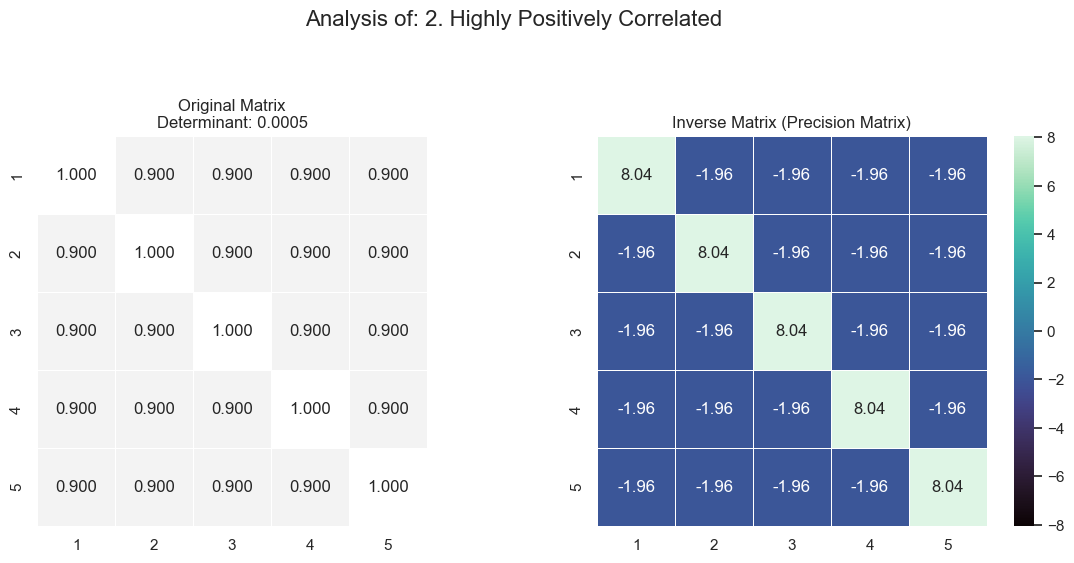

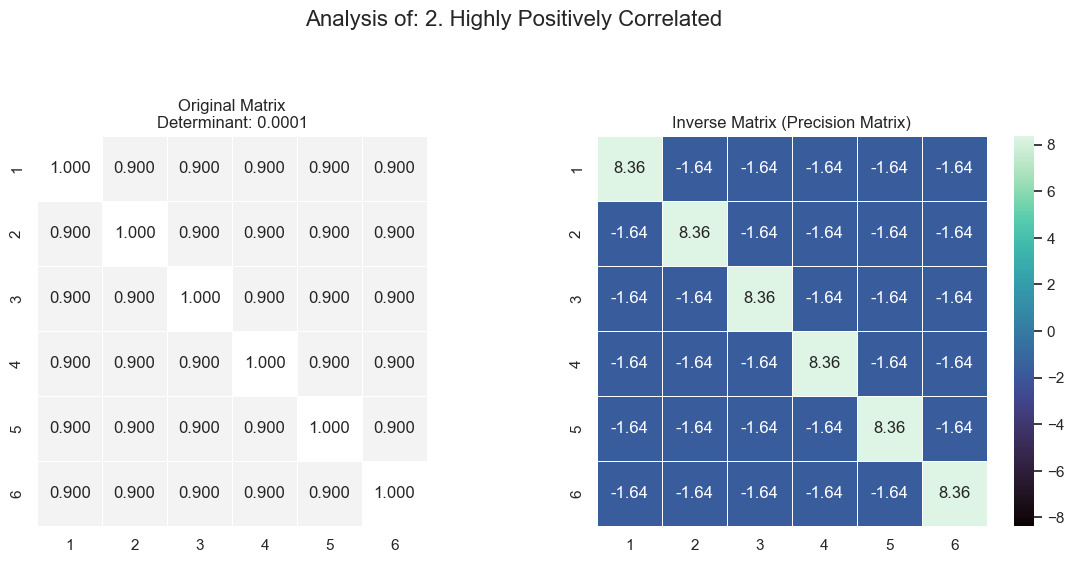

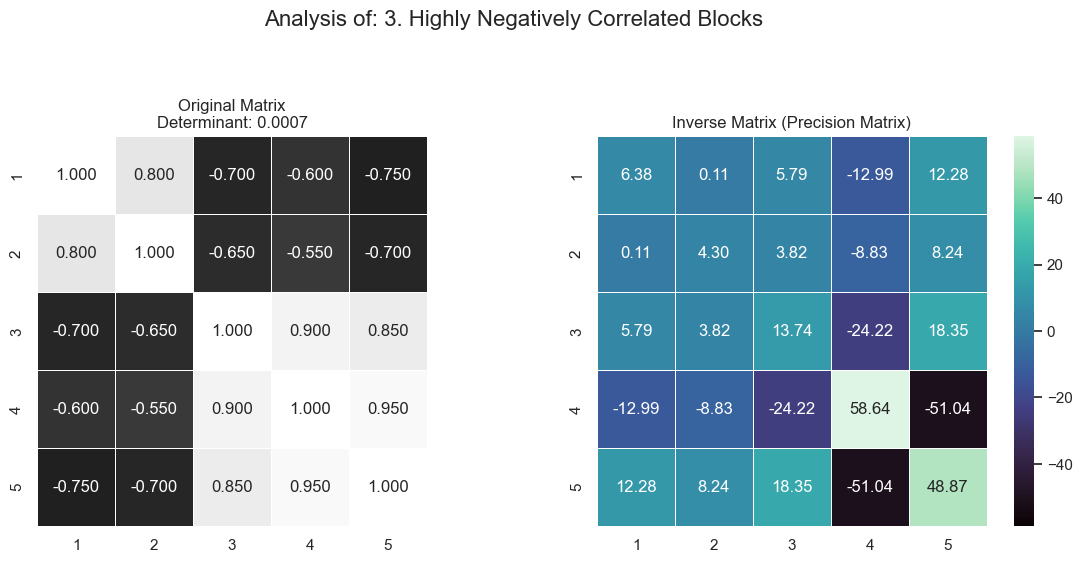

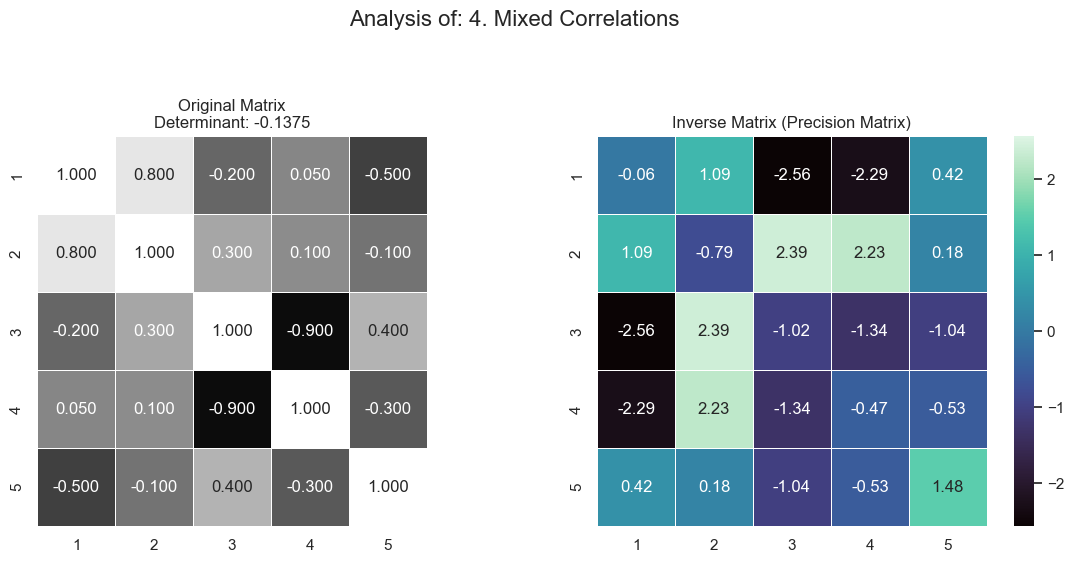

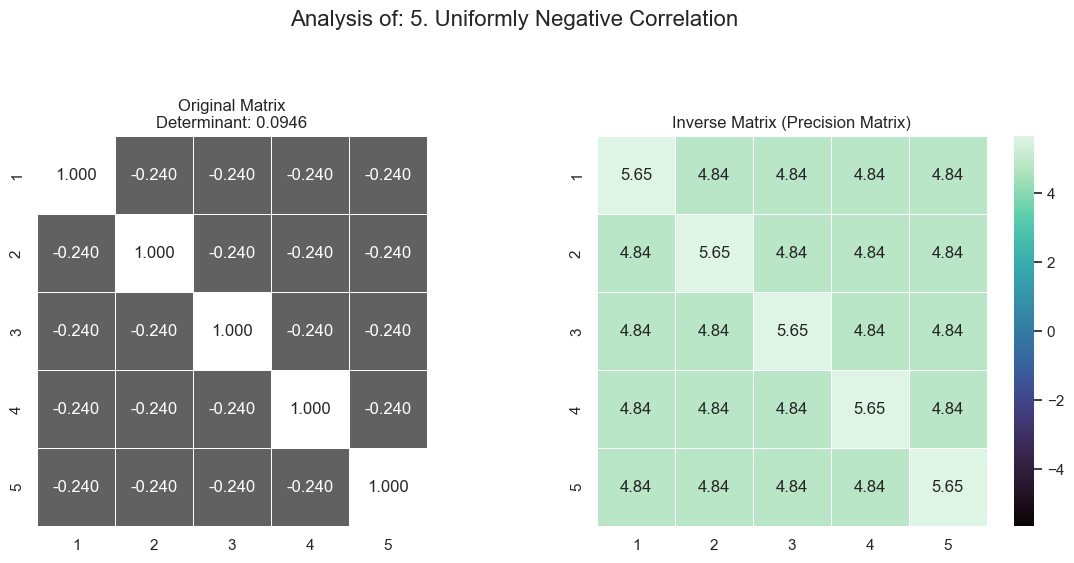

(0.09456855040000023,
 array([[5.64516129, 4.83870968, 4.83870968, 4.83870968, 4.83870968],
        [4.83870968, 5.64516129, 4.83870968, 4.83870968, 4.83870968],
        [4.83870968, 4.83870968, 5.64516129, 4.83870968, 4.83870968],
        [4.83870968, 4.83870968, 4.83870968, 5.64516129, 4.83870968],
        [4.83870968, 4.83870968, 4.83870968, 4.83870968, 5.64516129]]))

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for the plots
sns.set_theme(style="white")

def analyze_and_plot_matrix(matrix, title):
    """
    Calculates determinant and inverse, then plots the original matrix
    and its inverse using heatmaps.
    """
    # --- Ensure the matrix is valid ---
    # A covariance matrix must be symmetric and positive semi-definite.
    # We check for positive semi-definiteness by ensuring all eigenvalues are non-negative.
    eigenvalues = np.linalg.eigvals(matrix)
    if not np.all(eigenvalues >= -1e-10): # Using a small tolerance for floating point errors
        print(f"Warning: The matrix for '{title}' is not positive semi-definite!")
        # return None, None, None # Or handle as an error

    # --- Calculations ---
    determinant = np.linalg.det(matrix)

    # Calculate inverse, with error handling for singular matrices
    try:
        inverse_matrix = np.linalg.inv(matrix)
    except np.linalg.LinAlgError:
        print(f"Matrix for '{title}' is singular and cannot be inverted.")
        inverse_matrix = np.full_like(matrix, np.nan) # Fill with NaNs if not invertible

    # --- Plotting ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5.5))
    fig.suptitle(f'Analysis of: {title}', fontsize=16, y=1.02)

    # Plot Original Covariance Matrix
    sns.heatmap(matrix, ax=axes[0], annot=True, fmt=".3f", cmap="grey", vmin=-1, vmax=1,
                linewidths=.5, cbar=False, square=True)
    axes[0].set_title(f'Original Matrix\nDeterminant: {determinant:.4f}')
    axes[0].set_xticklabels(range(1, len(matrix)+1))
    axes[0].set_yticklabels(range(1, len(matrix)+1))


    # Plot Inverse Covariance Matrix (Precision Matrix)
    # Use a different color scale for the inverse as values can be large
    if not np.isnan(inverse_matrix).all():
        vmax_inv = np.max(np.abs(inverse_matrix)) # Symmetric color scale
        sns.heatmap(inverse_matrix, ax=axes[1], annot=True, fmt=".2f", cmap="mako",
                    linewidths=.5, cbar=True, square=True,
                    vmin=-vmax_inv, vmax=vmax_inv)
    axes[1].set_title('Inverse Matrix (Precision Matrix)')
    axes[1].set_xticklabels(range(1, len(matrix)+1))
    axes[1].set_yticklabels(range(1, len(matrix)+1))


    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return determinant, inverse_matrix

# --- 1. Identity Matrix (No Correlation) ---
identity_matrix = np.identity(5)
analyze_and_plot_matrix(identity_matrix, "1. Identity Matrix (Uncorrelated)")


# --- 2. Highly Positively Correlated Matrix ---
# All variables are strongly positively correlated with each other.
pos_corr_matrix = np.full((3, 3), 0.9)
np.fill_diagonal(pos_corr_matrix, 1)
analyze_and_plot_matrix(pos_corr_matrix, "2. Highly Positively Correlated")

# --- 2. Highly Positively Correlated Matrix ---
# All variables are strongly positively correlated with each other.
pos_corr_matrix = np.full((4, 4), 0.9)
np.fill_diagonal(pos_corr_matrix, 1)
analyze_and_plot_matrix(pos_corr_matrix, "2. Highly Positively Correlated")

# --- 2. Highly Positively Correlated Matrix ---
# All variables are strongly positively correlated with each other.
pos_corr_matrix = np.full((5, 5), 0.9)
np.fill_diagonal(pos_corr_matrix, 1)
analyze_and_plot_matrix(pos_corr_matrix, "2. Highly Positively Correlated")

# --- 2. Highly Positively Correlated Matrix ---
# All variables are strongly positively correlated with each other.
pos_corr_matrix = np.full((6, 6), 0.9)
np.fill_diagonal(pos_corr_matrix, 1)
analyze_and_plot_matrix(pos_corr_matrix, "2. Highly Positively Correlated")

# --- 3. Highly Negatively Correlated Matrix ---
# Here, we create two blocks of positively correlated variables,
# and these two blocks are negatively correlated with each other.
# This structure ensures the matrix is positive semi-definite.
neg_corr_matrix = np.array([
    [1.0, 0.8, -0.7, -0.6, -0.75],
    [0.8, 1.0, -0.65, -0.55, -0.7],
    [-0.7, -0.65, 1.0, 0.9, 0.85],
    [-0.6, -0.55, 0.9, 1.0, 0.95],
    [-0.75, -0.7, 0.85, 0.95, 1.0]
])
analyze_and_plot_matrix(neg_corr_matrix, "3. Highly Negatively Correlated Blocks")


# --- 4. Mixed Correlation Matrix ---
# A more realistic mix of positive, negative, and weak correlations.
# Var 3 and 4 are strongly negatively correlated. Var 1 and 2 are strongly positive.
# Var 5 has mixed relationships.
mixed_corr_matrix = np.array([
    [1.0, 0.8, -0.2, 0.05, -0.5],
    [0.8, 1.0, 0.3, 0.1, -0.1],
    [-0.2, 0.3, 1.0, -0.9, 0.4],
    [0.05, 0.1, -0.9, 1.0, -0.3],
    [-0.5, -0.1, 0.4, -0.3, 1.0]
])
analyze_and_plot_matrix(mixed_corr_matrix, "4. Mixed Correlations")


# --- 5. Uniformly Negative Correlation (Practical Limit) ---
# A matrix where all variables are mutually negatively correlated.
# For n=5, the theoretical limit for the negative correlation 'c' is c <= 1/(n-1) = 0.25.
# We will use -0.24 to create a valid positive semi-definite matrix.
uniform_neg_corr = -0.24
uniform_neg_matrix = np.full((5, 5), uniform_neg_corr)
np.fill_diagonal(uniform_neg_matrix, 1)
analyze_and_plot_matrix(uniform_neg_matrix, "5. Uniformly Negative Correlation")



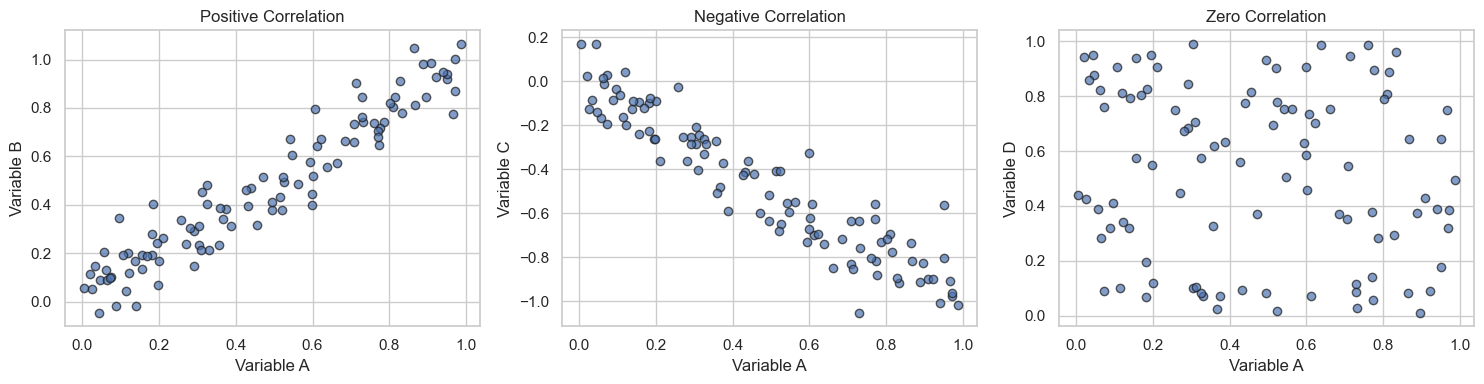

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 4)

# Generate correlated data
np.random.seed(42)
x1 = np.random.rand(100)
positive_corr = x1 + np.random.normal(0, 0.1, 100)
negative_corr = -x1 + np.random.normal(0, 0.1, 100)
zero_corr = np.random.rand(100)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.scatter(x1, positive_corr, alpha=0.7, edgecolors='k')
ax1.set_title('Positive Correlation')
ax1.set_xlabel('Variable A')
ax1.set_ylabel('Variable B')


ax2.scatter(x1, negative_corr, alpha=0.7, edgecolors='k')
ax2.set_title('Negative Correlation')
ax2.set_xlabel('Variable A')
ax2.set_ylabel('Variable C')

ax3.scatter(x1, zero_corr, alpha=0.7, edgecolors='k')
ax3.set_title('Zero Correlation')
ax3.set_xlabel('Variable A')
ax3.set_ylabel('Variable D')

plt.tight_layout()
plt.show()

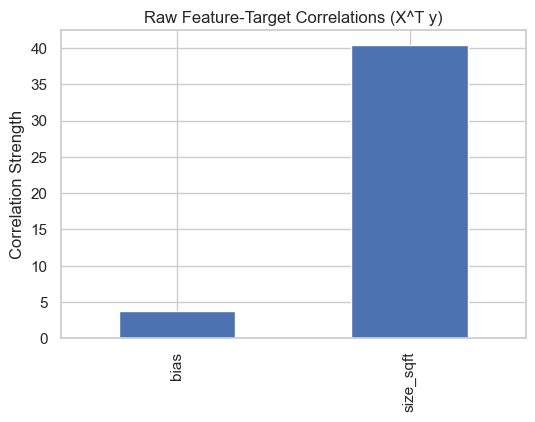

[ 3.8412332  40.38533602]


In [56]:
import pandas as pd

np.random.seed(0)
# Create 200 data points
n_samples = 200

# Feature 1: House Size
size_sqft = np.random.normal(10000, 2000, n_samples) / 1000.0

# Feature 2: Neighborhood Quality (correlated with size)
quality_of_neighborhood = size_sqft  + np.random.normal(0, 0.2, n_samples)

# True Target: Price (only depends on size)
y = (2 * size_sqft + np.random.normal(0, 10, n_samples)) / 1000.0

# Create our feature matrix X
X = pd.DataFrame({
    'size_sqft': size_sqft,
    # 'quality_of_neighborhood': quality_of_neighborhood
})
# Add a bias/intercept term
X_b = np.c_[np.ones(n_samples), X]

# Calculate the Raw Correlation Vector: X^T * y
raw_correlations = X_b.T @ y

# Plotting
plt.figure(figsize=(6, 4))
pd.Series(raw_correlations, index=['bias', 'size_sqft', ]).plot(kind='bar')
plt.title('Raw Feature-Target Correlations (X^T y)')
plt.ylabel('Correlation Strength')
# plt.yscale('log')
plt.show()

print(raw_correlations)

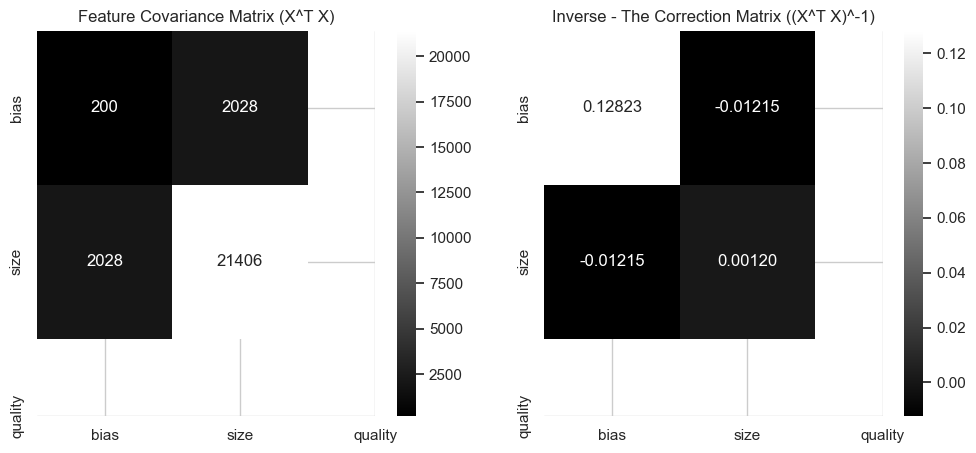

In [57]:
# Calculate the feature covariance matrix and its inverse
XTX = X_b.T @ X_b
XTX_inv = np.linalg.inv(XTX)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
labels = ['bias', 'size', 'quality']

sns.heatmap(XTX, annot=True, fmt='.0f', cmap='grey', ax=ax1, xticklabels=labels, yticklabels=labels)
ax1.set_title('Feature Covariance Matrix (X^T X)')

sns.heatmap(XTX_inv, annot=True, fmt='.5f', cmap='grey', ax=ax2, xticklabels=labels, yticklabels=labels)
ax2.set_title('Inverse - The Correction Matrix ((X^T X)^-1)')

plt.show()

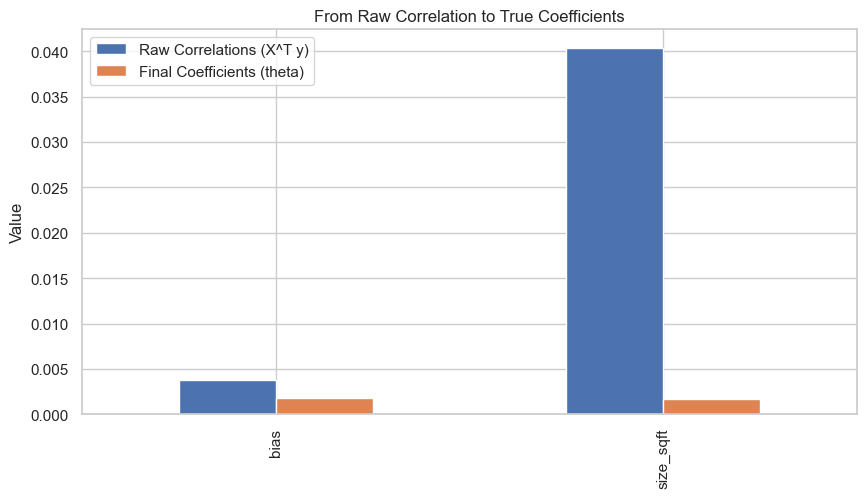

Final Coefficients (theta):
 [0.00185155 0.00171119]


In [59]:
# Calculate the feature covariance matrix and its inverse FOR THE HOUSE DATA
XTX_house = XTX
XTX_inv_house = np.linalg.inv(XTX_house)

# The final calculation
theta = XTX_inv_house @ raw_correlations

# Plotting the comparison
results = pd.DataFrame({
    'Raw Correlations (X^T y)': raw_correlations / 1000.0,
    'Final Coefficients (theta)': theta
}, index=['bias', 'size_sqft', ]) #'quality_of_neighborhood'])

results.plot(kind='bar', figsize=(10, 5))
plt.title('From Raw Correlation to True Coefficients')
plt.ylabel('Value')
plt.show()

print("Final Coefficients (theta):\n", theta)

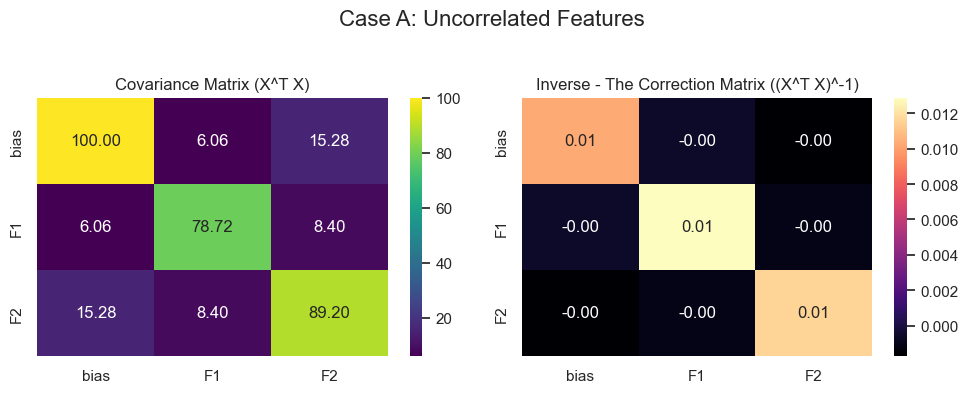

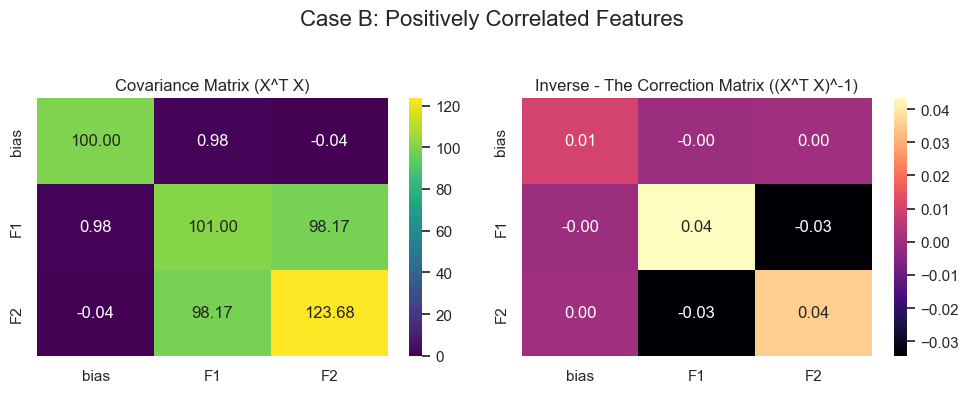

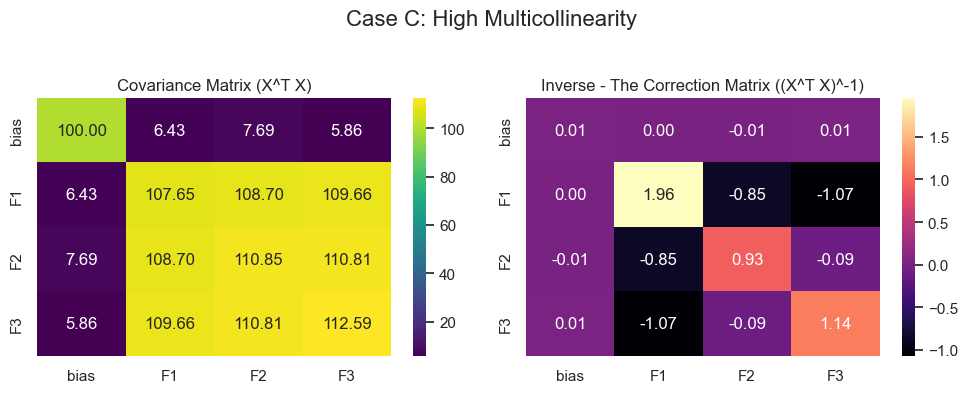

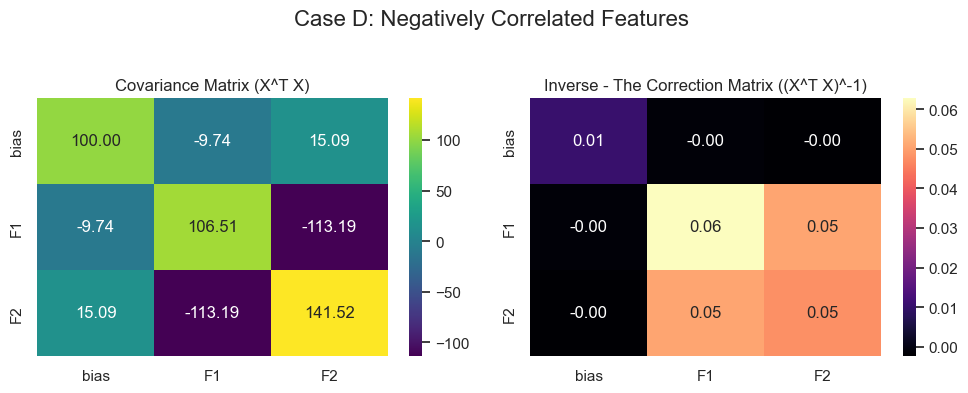

In [60]:
# Function to plot XTX and its inverse
def plot_covariance_and_inverse(X_matrix, labels, title):
    XTX = X_matrix.T @ X_matrix
    XTX_inv = np.linalg.inv(XTX)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(title, fontsize=16)
    
    sns.heatmap(XTX, annot=True, fmt='.2f', cmap='viridis', ax=ax1, xticklabels=labels, yticklabels=labels)
    ax1.set_title('Covariance Matrix (X^T X)')
    
    sns.heatmap(XTX_inv, annot=True, fmt='.2f', cmap='magma', ax=ax2, xticklabels=labels, yticklabels=labels)
    ax2.set_title('Inverse - The Correction Matrix ((X^T X)^-1)')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- Generate Data for Scenarios ---
np.random.seed(1)
n_samples = 100
# Case A: Uncorrelated features
f1_uncorr = np.random.randn(n_samples)
f2_uncorr = np.random.randn(n_samples)
X_uncorr = np.c_[np.ones(n_samples), f1_uncorr, f2_uncorr]

# Case B: Positively correlated features (House example)
f1_pos = np.random.randn(n_samples)
f2_pos = f1_pos + np.random.normal(0, 0.5, n_samples)
X_pos = np.c_[np.ones(n_samples), f1_pos, f2_pos]

# Case C: All features highly positively correlated (multicollinearity)
f1_multi = np.random.randn(n_samples)
f2_multi = f1_multi + np.random.normal(0, 0.1, n_samples)
f3_multi = f1_multi + np.random.normal(0, 0.1, n_samples)
X_multi = np.c_[np.ones(n_samples), f1_multi, f2_multi, f3_multi]

# Case D: Two features are negatively correlated
f1_neg = np.random.randn(n_samples)
f2_neg = -f1_neg + np.random.normal(0, 0.5, n_samples)
X_neg = np.c_[np.ones(n_samples), f1_neg, f2_neg]

# --- Plotting All Scenarios ---
plot_covariance_and_inverse(X_uncorr, ['bias', 'F1', 'F2'], "Case A: Uncorrelated Features")
plot_covariance_and_inverse(X_pos, ['bias', 'F1', 'F2'], "Case B: Positively Correlated Features")
plot_covariance_and_inverse(X_multi, ['bias', 'F1', 'F2', 'F3'], "Case C: High Multicollinearity")
plot_covariance_and_inverse(X_neg, ['bias', 'F1', 'F2'], "Case D: Negatively Correlated Features")
